### Classification

In this article we will be analyzing handwritten numbers in order to predict future pictures of handwritten digits. We will be using a dataset that is internal to the `sklearn` package. This example of Machine Learning is usually referred to as the *"Hello, World!"* of Machine Learning. 

In the last article we worked on a supervised learning model that used *regression* to **predicted values** and in this example we will be using *classification* to **predict classes**. We will be using what is called the MNIST dataset. The MNIST dataset contains 70,000 small handwritten digits from high schoolers in the U.S.A. When Data Scientists build new classification models, a lot will test it against this dataset. There are a couple keys that might be worth explaining in the dataset before we load it.

*DESCR* - is a key describing the dataset
*data* - a key containing an array with one row per instance and one column per feature
*target* - a key containing an array with labels

Let's go ahead and load our data!

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)

### Viewing our data types

One important thing to remember is that our Machine Learning Models work best with numeric values and not so well with objects. Let us make sure that we are only dealing with numeric objects. We can see based on the next output that our target values are strings (objects), so we should go ahead and fix that after we load in our data.

In [2]:
print("Data's data type:", mnist["data"].dtype)
print("Target's data type:", mnist["target"].dtype)

Data's data type: float64
Target's data type: object


In [3]:
print("Keys: ", mnist.keys())

## Separate oout our features from our labels
X, y = mnist["data"], mnist["target"]

## Remember that our target values are in string as of now, let us change it to integer so that our model works better
y = y.astype(np.uint8)
print("X Shape (aka our features): ", X.shape)
print("y Shape (aka our targets): ", y.shape)

Keys:  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])
X Shape (aka our features):  (70000, 784)
y Shape (aka our targets):  (70000,)


### A quick overview of arrays

> A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

Understanding arrays will be very valuable for understanding how we will reshape the dataset to generate an image to test our classification model.

Square Root of 784 (i.e. the length of the array of our data):  28.0
Label (Digit Value):  0
Label (Digit Value):  4
Label (Digit Value):  1


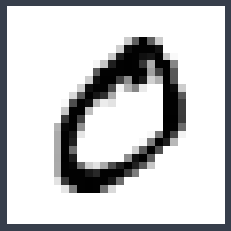

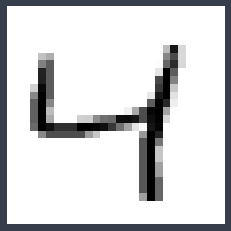

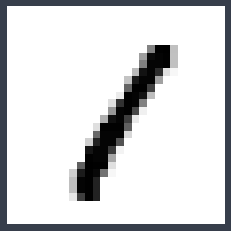

In [4]:
import matplotlib.pyplot as plt
import numpy as np

print("Square Root of 784 (i.e. the length of the array of our data): ", np.sqrt(784))

## A function that quickly allows you to test a value in the dataset
def digit_with_label(num=0, X=X, y=y):
    ## Get the square root of the array
    sqrt_value = int(np.sqrt(X.shape[1]))
    
    ## The location in the array you want to see the value of the digit
    if type(num) == int:
        X_value = X[num]
        y_value = y[num]
        reshape_value = X_value.reshape(sqrt_value, sqrt_value)
        plt.imshow(reshape_value, cmap="binary")
        plt.axis("off")
        
    elif type(num) == list:    
        for n in num:
            X_value = X[n]
            ## The location in the array of the actual value of the digit
            y_value = y[n]
            ## Change the flat array in to a square by getting the square root of the array (e.g. if the length of the array were 64, it would create a 6x6 square)    
            reshape_value = X_value.reshape(sqrt_value, sqrt_value)
            ## Print the value of the digit
            print("Label (Digit Value): ", y_value)
            ## plot the reshaped array
            plt.figure()
            plt.imshow(reshape_value, cmap="binary")
            plt.axis("off")
    else:
        print("Please enter a single integer or a list of integers")
    
digit_with_label(num=[1,2,3])

### Training and Test Sets

If you aren't familiar with the concept of test and training sets, please view my previous post [here](https://datadazed.com/2020/02/05/machine-learning-housing-example-project/#Building_the_Training_and_Testing_Sets_for_the_model) to get a better understanding. The MNIST has already split the data into test and training sets for us, so we won't have to worry about importing `sklearn` libraries to do the 'dirty work' for us.

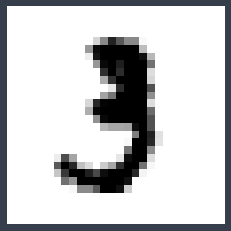

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Let us verif the data is accurate still and didn't get shuffled or jumbled by using the function we created earlier
digit_with_label(num=10, X=X_train, y=y_train)

### Binary Classifiers 

It might be a good time to discuss the types of classifiers, since we are going to build a classification model. One such model is called a binary classifier, which is useful if you need to return a boolean field (e.g. True or False). We could use this type of model on our dataset, but it would only return whether or not a digit is a single digit, e.g. 5 or not 5. As you could already imagine, this might be extremely inefficient if we are training our 10 digits (1 to 10). It will require us to run the learning algorithm 10x's (1 or not 1, 2 or not 2, 3 or not 3, etc...). For example's sake, we can train a binary classifier as an example.

In [6]:
from sklearn.linear_model import SGDClassifier

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

array([ True])

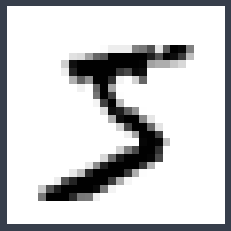

In [7]:
## Let's see if the first digit given in the X (our features) is equal to 5
digit_with_label(0)

## Based on the graph, it looks like the digit at[0] is in fact 5, but will our model predict that it is 5, too? 
## If the array returns `true` than it predicts that it is a five, otherwise it returns `false`
sgd_clf.predict([X[0]])

### Performance Measures

It is much more difficult to evaluate a classifier (our model predicting class) than it is to evaluate the performance of a model that is training a regressor (predicting a value). We discussed a little in the last post about using cross validation. Let us test out a cross validation score.

In [8]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

#### Dumb Classifier

Based on the output above our model predicts the correct value over 95% of the time! That is a fantastic value, but is it really that good of a model? We can use a dumb classifier to determine how well the model performs if it just assumes every value is not 5. We can do this by importing sklearn's `BaseEstimator` method and building a class that returns all False.

In [9]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

#### Confusion Matrix

Our model only performs 5% better than just running through all `False` results. One way to better predict performance is by using a *Confusion Matrix*. A confusion matrix determines the amount of times instances of Class A are classified as Class B, e.g. number of times 5 was actually predicted as 3 (you would look at the 5th row and the 3rd column). A confusion matrix is setup so that each *row* represents an *actual* class and each *column* represents a *predicted* class.

<img src="https://datadazed.s3-us-west-2.amazonaws.com/confusion_matrix.png" width=750px>

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

## The first row will be non-5 images, where ~53k were correctly predicted as non-5 images and ~1k were incorrectly predicted as non-5 images
## The second row will be 5 images, where ~2k are wrongly classified as non-5, and ~3k are predicted correctly as 5 images
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [12]:
## A perfect dientifier would only have true positives and true negatives
y_train_perfect_predict = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predict)

array([[54579,     0],
       [    0,  5421]])

#### Precision

\begin{equation}\label{eq: Precision}
precision = \frac{TP}{TP+FP}
\end{equation}

**If we reference the output above**

| Negative  | Positive |
|:---:|:---:|
| True Negative (TN)  | False Positive (FP)  |
| False Negative (FN)  |  True Positive (TP) |

Precision is the accuracy of positive predictions. You could make a single positive prediction and if you ensure it is correct your precision would be 100% because 1/1 = 100%. This isn't very useful, which is why *precision* is used with *recall*.

#### Recall

Recall is also called *sensitivity* or the *true positive rate (TPR)*, which is the ratio of positive instances that are correctly detected by the classifier.

\begin{equation}\label{eq: Recall}
Recall = \frac{TP}{TP+FN}
\end{equation}

#### F1 Score

The combination of precision and recall is named the F1 Score, and it is a simple way to compare 2 classifiers. The F1 score is the *harmonic mean* for precision and recall, whereas the mean regular mean treats all values equally, the harmonic mean places more emphasis on low values. This means that the classifier will only get a high F1 score if precision and recall are high.

\begin{equation}\label{eq: F1}
F1 Score = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 * \frac{precision * recall}{precision+recall} = \frac{TP}{TP + \frac{FN + FP}{2}}
\end{equation}

The F1 score will favor classifiers that have similar precision and recall, but the F1 score isn't automatically better than precision and recall on their own. Their are specific use cases for all 3. For example, it might be better for safety reasons to have high precision in a model where you are detecting a specific class, but it would potentially come at the cost of throwing out many inputs that fit the label (low recall). For example, youTube might value high precision when it comes to determining what videos are safe for children to watch, even if it comes at the cost of throwing out videos that where safe to watch, but the model didn't classify them correctly. Another example where we might want high recall, but low precision is early detection of adverse weather. I am sure we all have examples where the news predicted a major snowstorm/tropical storm based on several input variables and it turned out to be bunk. They most likely trained their models for high recall, but low precision, just to be safe (think if they trained for high precision and did not warn th public about a potential hurricane).

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision Score: ", precision_score(y_train_5, y_train_pred))
print("Recall Score: ", recall_score(y_train_5, y_train_pred))

## Let us try calculating the F1 Score

print("F1 Score: ", f1_score(y_train_5, y_train_pred))

Precision Score:  0.8370879772350012
Recall Score:  0.6511713705958311
F1 Score:  0.7325171197343846


#### Thresholds

Many times you may want to set a threshold for the precision/recall trade off. This can easily be set in `scikit-learn`. If we raise the threshold of the model we end up decreasing the recall of the model. We can use the `cross_val_predict` method to determine what threshold we should set to optimize our *F1 Score*.

<img src="https://datadazed.s3-us-west-2.amazonaws.com/Precision_Recall_Tradeoff.png" width=750px>

Y Scores:  [2164.22030239]
Threshold set to 0:  [ True]
Threshold set to 8000:  [False]


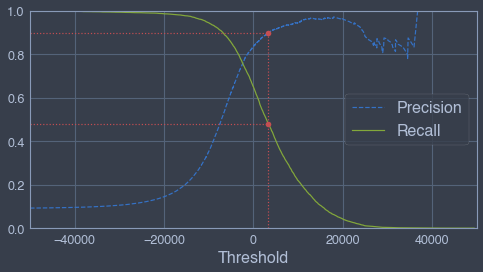

In [21]:
from sklearn.metrics import precision_recall_curve

y_scores = sgd_clf.decision_function([X[0]])
print("Y Scores: ", y_scores)

### Set threshold to 0 
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print("Threshold set to 0: ", y_some_digit_pred)
### Let us set the threshold a little higher
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
print("Threshold set to 8000: ", y_some_digit_pred)

### Use cross validation prediction to find optimal threshold
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])      
    
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]  

plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                                                                         
plt.show()

### The ROC Curve

ROC stands for *Receiver Operating Characteristic* curve, in which the True Positive Rate (TPR, also known as Recall) is plotted against the False Positive Rate (FPR). False Positive Rate is the ratio of negative instances that incorrectly identified as positive, and is equal to 1 - TNR (True Negative Rate). TNR is also called *specificity*. The ROC curve plots *sensitivity* (recall) vs 1 - *specificty*.

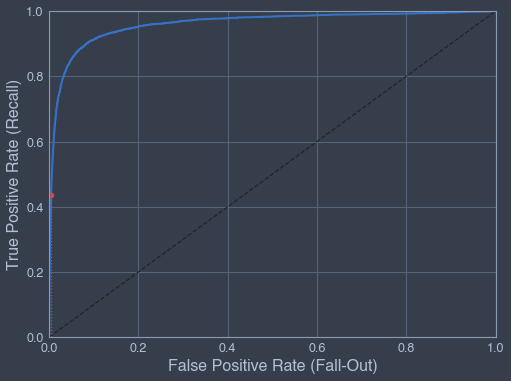

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")
plt.show()

#### AUC (Area Under Curve)

As we can see, with an increase in Recall, we also see an increase in the rate of false positives. The dotted line that cuts the graph in half diagonally, represents a purely random classifier. A good classifier stays as far away from that dotted line as possible. One way to compare these classifiers is to measure the *area under the curve*, and a perfect classifier will have a *ROC AUC* of 1, whereas a perfectly random classifier will have a *ROC AUC* equal to .5.

In [28]:
from sklearn.metrics import roc_auc_score

print("ROC AUC Score: ", roc_auc_score(y_train_5, y_scores))

ROC AUC Score:  0.9604938554008616


#### Random Forest Classifier

A *Random Forest* Classifier is a series of decision trees with an optimized outcome based on results of an aggregate of the decision trees, and we will cover them in depth in another post. The important thing to mention right now is that a *Random Forest* uses `predict_proba()` instead of the `decision_function()`. Also, recall that a *Random Forest* is an ensemble learning method, as it learns from other models.

Random Forest ROC AUC Score:  0.9983436731328145


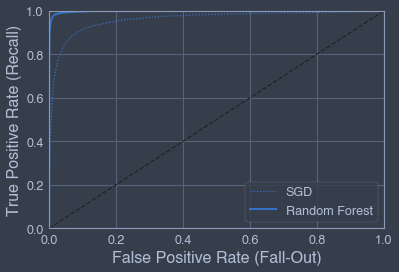

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

## In order to plot we nee scores and the function above only gets us probabilities

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

## Plot the results and see how much more accurate the Random Forest ROC AUC Score is than the Stochastic Gradient Descent Classifier
print("Random Forest ROC AUC Score: ", roc_auc_score(y_train_5, y_scores_forest))
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

### Multiclass Classification

Up until this point we have only being reviewing one digit (5) and trying to classify as whether the digit we are testing is 5 (True or False). As I mentioned earlier, this isn't very useful if we need to compare and train several digits. We need to move away from the use of a *Binary Classifier* and into the use of a *Multiclass Classifier* (sometimes called a *Multinomial Classifier*), which can distinguish between more than two classes. 

`Scikit-Learn` can automatically detect when you are trying to run a binary classification for a multiclass classification task.

In [41]:
sgd_clf.fit(X_train, y_train)
print("Predicting the 0th Digit with a binary classifier: ", sgd_clf.predict([X[0]]))

some_digit_scores = sgd_clf.decision_function([X[0]])
print(some_digit_scores)

### You can also force scikit-learn into using one versus one (OvO, binary classifier) or 
### using a multiclass

from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
print("One versus One: ", ovo_clf.predict([X[0]]))
print("Length: ", len(ovo_clf.estimators_))

### Now train the Random Forest

forest_clf.fit(X_train, y_train)
print("Forest OvM: ", forest_clf.predict([X[0]]))
print("Forest Predict: ", forest_clf.predict_proba([X[0]]))

Predicting the 0th Digit with a binary classifier:  [3]
[[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]
One versus One:  [5]
Length:  45
Forest OvM:  [5]
Forest Predict:  [[0.   0.   0.01 0.08 0.   0.9  0.   0.   0.   0.01]]


#### Classifier Predictions

You can see that the prediction in random forest in very confident at the 5th digit as at the 5 index is .9 which means that the model has a 90% probability of classifying the 5th digit correctly.

Now we can use cross validation score to evaluate these classifiers. You can also choose to scale the inputs using the standard scaler.

In [43]:
from sklearn.preprocessing import StandardScaler

print("Cross Validation Score: ", cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy"))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
print("Cross Val Scaled: ", cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))

Cross Validation Score:  [0.87365 0.85835 0.8689 ]
Cross Val Scaled:  [0.8983 0.891  0.9018]


### Error Analysis

The model is now developed, but we need to measure the performance. Recall in the previous sections that we were able to construct a confusion matrix and fill in the predictions using `cross_val_predict`. Let us do that now, but with a multiclass classifier model. In the confusion matrix plot below we will be able to see that the digit 5 isn't as easily predicted as the other digits.

Confusion Matrix for Multiclass:  [[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


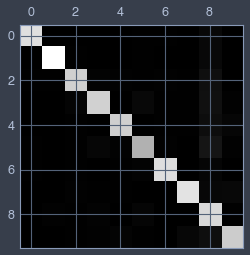

In [44]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Multiclass: ", conf_mx)

### Plot the Confusion Matrix to make it easier to visualize

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

#### Focus on plotting the errors

The previous plot helps us visualize a little better on the performance of our model for each digit, but let us purely plot the errors to get a better visual than what we previously had. We will be able to tell that there are quite a bit of errors when it comes to classifying digits as 8's (column is the False Positive), but 8's in general normally get classified correctly (Row is True Positive).

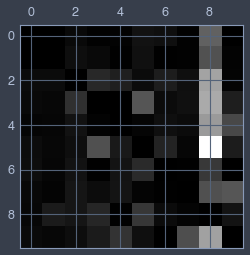

In [45]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

### Multilabel Classification

*Multilabel Classification* is useful in scenarios in which you need to classify several features in one image. Facial recognition in a photo is a good example of needing *Multilabel Classification*. You would want the model to recognize more than one person's face if multiple people are in the photo. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

print("KNN Prediction: ", knn_clf.predict([X[0]])) ## Which we know is a 5

## Create predictions and then check the F1 Score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, )